In [19]:
import os
import numpy as np 
import matplotlib.pyplot as plt

print(os.path.exists("/mounts/Datasets1/ChallengeDeep/train/"))

train_path = "/mounts/Datasets1/ChallengeDeep/train/"

categories = np.sort(os.listdir(train_path))

True


In [20]:
category_paths = []

for category in categories :
    category_paths.append(os.path.join(train_path, category))

In [21]:
number_of_images = []
image_paths = {}
image_names = {}

for category_path, category in zip(category_paths, categories):
    number_of_images.append(len(os.listdir(category_path)))
    image_names[category] = np.sort(os.listdir(category_path))
    image_paths[category] = []
    for image in image_names[category]:
        image_paths[category].append(os.path.join(category_path, image))

In [22]:
print("Nombre moyen d'image par catégorie :", np.mean(number_of_images))
print("Nombre médian d'image par catégorie :", np.median(number_of_images))
print("Nombre max d'image par catégorie :", np.max(number_of_images))
print("Nombre min d'image par catégorie :", np.min(number_of_images))

print("Categories with more than 100000 images :", *np.array(categories)[np.array(number_of_images) > 100000])
print("Categories with less than 100 images :", *np.array(categories)[np.array(number_of_images) < 100])

Nombre moyen d'image par catégorie : 9946.441860465116
Nombre médian d'image par catégorie : 2036.5
Nombre max d'image par catégorie : 243570
Nombre min d'image par catégorie : 37
Categories with more than 100000 images : 001_detritus 036_Calanoida
Categories with less than 100 images : 023_Scyphozoa 024_Ctenophora 026_ephyra 079_gonophore__Abylopsis_tetragona


Les catégories ont généralement quelques milliers d'image mais cela varie énormément. Il faudra notamment porter beaucoup d'attention aux catégories avec moins de 100 images car ce sont celles que l'algo aura le plus de mal à prédire certainement. 
On a aussi 2 catégories avec plus de 100 000 images.

In [23]:
from PIL import Image

def afficher_image(categorie, numero_image, image_paths=image_paths):
    im = Image.open(image_paths[categories[categorie]][numero_image])
    im.show()
    print(image_paths[categories[categorie]][numero_image])


In [24]:
afficher_image(10, 20)

/mounts/Datasets1/ChallengeDeep/train/010_Hyperiidea/116.jpg


More Image Data


In [55]:
image_Data = {} #Images as pixel value arrays per category
Image_Hists = {} #Image psizes per category
image_sizes = {} #Images sizes per category

for category in categories:
    image_Data[category]=[]
    Image_Hists[category]=[]
    image_sizes[category]=[]
    for path in image_paths[category][:10]:
        image = Image.open(path)
        image_Data[category].append(list(image.getdata()))
        Image_Hists[category].append(list(image.histogram()))
        image_sizes[category].append(image.size)

TypeError: 'tuple' object is not callable

Check If image sizes are the same in a category

In [26]:
def checkSizeIsequal(category):
    test = np.sum(image_sizes[category]==image_sizes[category][::-1])
    print("Toutes les images de {} sont de même taille : {}".format(category, bool(test)))

In [27]:
checkSizeIsequal(categories[0])

Toutes les images de 000_Candaciidae sont de même taille : False


Show a scatterplot of Image Sizes

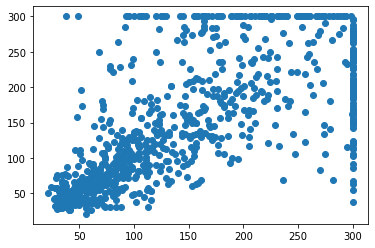

In [41]:
X,Y = [],[]
for category in categories :
    X.append([image_sizes[category][i][0] for i in range(len(image_sizes[category]))])
    Y.append([image_sizes[category][i][1] for i in range(len(image_sizes[category]))])
plt.scatter(X,Y) #matplotlib
# sns.scatterplot(X,Y) #seaborn
plt.show()

Print Image Histograms

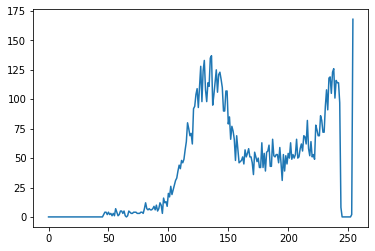

In [53]:
category, image =  5, 5
plt.plot(Image_Hists[categories[category]][image][:255])
plt.show()